# Лабораторная работа 3
## Сиразетдинов Азат 368796

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [38]:
data = pd.read_csv('Student_Performance.csv')
data["Extracurricular Activities"] = data["Extracurricular Activities"].apply(lambda x: 1.0 if x == "Yes" else 0.0)
data = data.astype(float)
print(data)

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0               7.0             99.0                         1.0          9.0   
1               4.0             82.0                         0.0          4.0   
2               8.0             51.0                         1.0          7.0   
3               5.0             52.0                         1.0          5.0   
4               7.0             75.0                         0.0          8.0   
...             ...              ...                         ...          ...   
9995            1.0             49.0                         1.0          4.0   
9996            7.0             64.0                         1.0          8.0   
9997            6.0             83.0                         1.0          8.0   
9998            9.0             97.0                         1.0          7.0   
9999            7.0             74.0                         0.0          8.0   

      Sample Question Paper

### Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

In [39]:
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


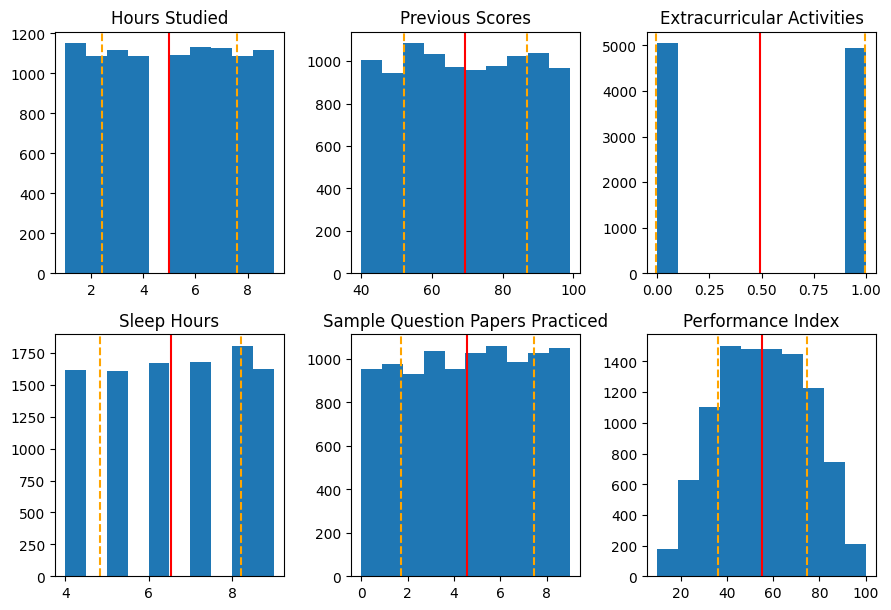

In [40]:
plt.figure(figsize=(9, 9))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    offset = data[column].std()
    mid = data[column].mean()
    plt.hist(data[column])
    plt.title(column)
    plt.axvline(mid, color='red')
    plt.axvline(mid - offset, color='orange', linestyle='--')
    plt.axvline(mid + offset, color='orange', linestyle='--')
plt.tight_layout()
plt.show()

### Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка

In [41]:
data = data.dropna()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
assert categorical_columns.values.size == 0

scaler = MinMaxScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,1.0,1.0,0.111111,91.0
1,0.375,0.711864,0.0,0.0,0.222222,65.0
2,0.875,0.186441,1.0,0.6,0.222222,45.0
3,0.500,0.203390,1.0,0.2,0.222222,36.0
4,0.750,0.593220,0.0,0.8,0.555556,66.0
...,...,...,...,...,...,...
9995,0.000,0.152542,1.0,0.0,0.222222,23.0
9996,0.750,0.406780,1.0,0.8,0.555556,58.0
9997,0.625,0.728814,1.0,0.8,0.555556,74.0
9998,1.000,0.966102,1.0,0.6,0.000000,95.0


### Разделите данные на обучающий и тестовый наборы данных.

In [42]:
X = data.drop(columns=['Performance Index'])
Y = data['Performance Index']
X = np.c_[np.ones(X.shape[0]), X]  # bias

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.

In [43]:
def lin_reg(X, Y):
    B = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return B

In [44]:
def r_squared(Y_pred, Y):
    return 1 - ((Y_pred - Y) ** 2).sum() / ((Y.mean() - Y) ** 2).sum()

### Модель 1
Все признаки

In [45]:
B_model1 = lin_reg(X_train, Y_train)
Y_pred_model1 = np.dot(X_test, B_model1)
r2_model1 = r_squared(Y_test, Y_pred_model1)
print(f"r^2 для модели 1 со всеми признаками: {r2_model1}")

r^2 для модели 1 со всеми признаками: 0.9887203279837657


### Модель 2
Без учета количесства сна

In [46]:
X_train_model2 = np.delete(X_train, [3], axis=1)
X_test_model2 = np.delete(X_test, [3], axis=1)
B_model2 = lin_reg(X_train_model2, Y_train)
Y_pred_model2 = np.dot(X_test_model2, B_model2)
r2_model2 = r_squared(Y_test, Y_pred_model2)
print(f"r^2 для модели 2 без учета количества сна: {r2_model1}")

r^2 для модели 2 без учета количества сна: 0.9887203279837657


### Модель 3

Без учета предыдущих оценок

In [47]:
X_train_model3 = np.delete(X_train, 1, axis=1)
X_test_model3 = np.delete(X_test, 1, axis=1)
B_model3 = lin_reg(X_train_model3, Y_train)
Y_pred_model3 = np.dot(X_test_model3, B_model3)
r2_model3 = r_squared(Y_test, Y_pred_model3)
print(f"r^2 для модели 3 без учета предыдущих оценок: {r2_model3}")

r^2 для модели 3 без учета предыдущих оценок: 0.8139705702127584


Лучше всего показала себя модель 1 и 2
Можно сделать вывод что количество сна не влияет на полученную оценку, но существует корреляция между предыдущими оценками и будущими 